<a href="https://colab.research.google.com/github/euglpz/roma_airbnb/blob/main/Roma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Presentación  
Projecto en el cual, a partir de la base de datos de Airbnb de la ciudad de Roma, se logran responder inquietudes de eventuales clientes que desean realizar un viaje y quieren hospedarse en la ciudad de Roma.  
Se utilizó el lenguaje **Python** para el desarrollo del proyecto.



**Link del archivo utilizado:**
http://data.insideairbnb.com/italy/lazio/rome/2022-06-07/visualisations/listings.csv

**Link Google Colab:**
https://colab.research.google.com/drive/11xbm3GWiIV3XPSY71ZvNPzTh9KUJgAce?usp=sharing


# Problema

Se presenta un nuevo cliente que desea visitar la ciudad de Roma por primera vez.

El cliente está interesado en contratar el hospedaje vía airbnb y desea conocer a ciencia cierta:


1.   ¿Qué barrios de Roma presentan las tarifas más altas por noche?
2.   ¿Cuáles son los barrios con mayor oferta de propiedades?
1.   ¿Los barrios con mayor oferta de propiedades son puntuados con la mejor ubicación?
2.   ¿Cuales son las amenities más comunes que se ofrecen vía airbnb en Roma?








# Estructura de Datos

Para resolver las preguntas de nuestro cliente de la manera más precisa posible:
 

1.   Extraeremos los datos de los hospedajes ofrecidos en Roma de la página oficial Inside Airbnb.
2.   Estructuraremos los datos por pregunta de la siguiente manera:

> **¿Qué barrios de Roma presentan mayores tarifas por noche?** Utilizaremos la estructura Diccionario para guardar los datos de los distintos barrios que ofrecen alquileres en Roma y sus tarifas por noche.
Responderemos esta pregunta con el gráfico de cajas y bigotes.

*   precio_por_barrio = {'barrio1':[lista de tarifas de barrio1], ... }





> **¿Cuáles son los barrios con mayor oferta de propiedades?** Utilizaremos la estructura Diccionario para almacenar los diferentes barrios que ofrecen alquileres en airbnb y la cantidad de propiedades ofrecidas.
Responderemos esta pregunta con el gráfico de barras.


*   cant_prop_por_barrio = {'barrio1':NumPropiedades, ... }


> **¿Los barrios con mayor oferta de propiedades son puntuados con la mejor ubicación?** Utilizaremos la estructura Diccionario para almacenar los diferentes barrios que ofrecen alquileres en airbnb y la puntuación promedio de cada barrio por.

*   punt_prom_por_barrio = {'barrio1':PuntPromedio, ... }

> **¿Cuales son las amenities más comunes que se ofrecen vía airbnb en Roma?** Utilizaremos la estructura Diccionario para almacenar las diferentes amenities que se ofrecen en airbnb y su frecuencia. 

*   amenities = {'amenity1':NumApariciones, ... }



# Carga de datos


Se obtiene de la página oficial Inside Airbnb los datos de Roma mediante un archivo CSV.

Extracción de Datos:

La resolución del problema requiere que se monte Google Drive desde dónde leeremos el archivo Listings2.CSV que contienen la información necesaria para nuestro análisis.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Una vez montado Google Drive,estamos en condiciones de leer el archivo Listings2.CSV y en su lectura ir creando las estructura de datos que vamos a necesitar.

In [ ]:
import csv
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from wordcloud import WordCloud

path = '/content/drive/MyDrive/Colab Notebooks/'
#path = '/content/drive/MyDrive/Programacion/'
#path = '/content/drive/MyDrive/Colab Notebooks/'

precio_por_barrio = {} #dicccionario para guardar precios por barrio
punt_por_barrio = {} #diccionario para guardar puntuaciones por barrio
amenities_cant = {} #diccionario para guardar las apariciones de cada amenity


#Leemos csv y extraemos datos
with open(path+'listings2.csv') as File:
    reader = csv.reader(File, delimiter=',')
    for row in reader:
        if row[39] == 'price':
            continue #Salteamos el header para pasar a la primera linea de datos
        else:
            p = float(row[39][1:].replace(',','')) #39: indice del precio - Leemos precio y eliminamos los caracteres que no permiten pasar a formato float
            barrio = row[27] #27: indice para los barrios
            
            #Creamos el primer diccionario para almacenar el listado de precios en cada uno de los barrios
            if barrio in precio_por_barrio.keys(): #Armamos diccionario {barrio:[lista de precios],...}
                precio_por_barrio[barrio].append(p)
            else:
                precio_por_barrio[barrio] = [p]
            
            if row[65] != '': #Salteamos las propiedades que no están puntuadas
              punt = float(row[65]) #65: indice del puntaje de ubicacion

              #Creamos el segundo diccionario para almacenar el listado de puntuación por ubicación en cada uno de los barrios
              if barrio in punt_por_barrio.keys(): #Armamos diccionario {barrio:[lista de puntajes],...}
                  punt_por_barrio[barrio].append(punt)
              else:
                  punt_por_barrio[barrio] = [punt]

            amenities = (row[38].replace('"','').replace('[','').replace(']','').replace('\\u2019','\'').replace('\\u2013','-').replace('\\','')).split(",") 
            # 38: indice de amenities - Eliminamos caracteres, reemplazamos algunos según UNICODE y armamos una lista
            
            #Creamos el segundo diccionario para almacenar el listado de amenities y su frecuencia en las propiedades ofrecidas por airbnb
            for amenity in amenities: #Armamos diccionario {amenity:cantidad de apariciones}
              if amenity in amenities_cant.keys():
                amenities_cant[amenity] += 1
              else:
                amenities_cant[amenity] = 1

            

**Función Promedio**

Permite para calcular el promedio de cualquier lista utilizada en la resolución de este problema.

In [ ]:
def promedio_lista(lista):
  '''
  La función promedio_lista calcula el valor promedio de una lista de valores
  Inputs
  [lista]: Lista de elementos tipo float.

  Return
  promedio(float): Devuelve un valor tipo float: el promedio de los elementos que conforman la lista.
  '''
  cont=0
  sum=0
  for i in lista:
    cont+=1
    sum=sum+i
    promedio=sum/cont
  return promedio

**Función Ordena**

Permite ordenar de mayor a menor las tuplas clave-valor de cualquier diccionario.


In [ ]:
def ordena_dic(dic):
  '''
  La función ordena_dic ordenar de mayor a menor las tuplas (clave-valor) de cualquier diccionario.
  Inputs
  { dic } = diccionario que contiene valores
  
  Return
  { dic_ordenado }: Devuelve el diccionario recibido ordenado de manera descendente
  las tuplas (clave-valor) de cualquier diccionario por valor.
  '''
  import operator 
  dic_ordenado = {}
  
  #El método itemgetter(1) permite ordenar la lista de tuplas por valor, reverse: permite ordenarlos de mayor a menor.
  dic_ordenado = dict(sorted(dic.items(), key=operator.itemgetter(1), reverse=True))
  return(dic_ordenado)

  

# 1. ¿Qué barrios de Roma presentan mayores tarifas por noche?

Habiendo ya cargado la estructura definida procedemos a realizar un gráfico de cajas y bigotes para respoder la primera pregunta de nuestro cliente.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


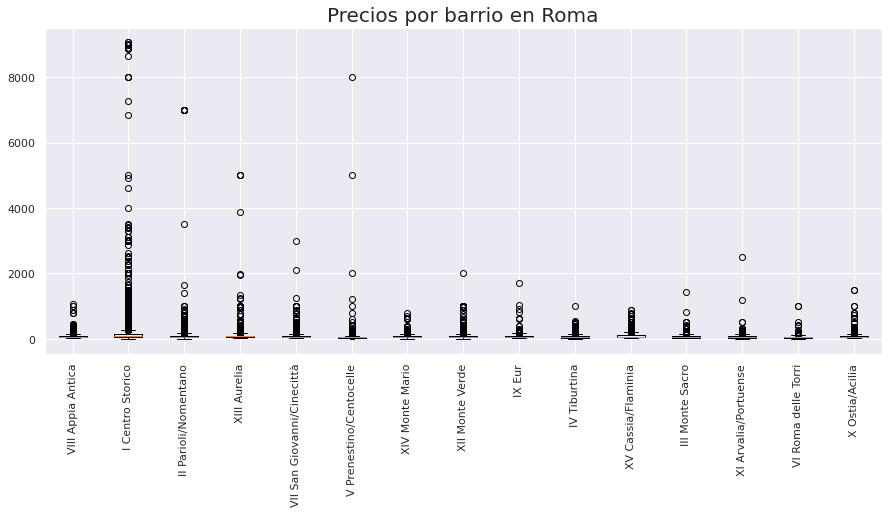

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


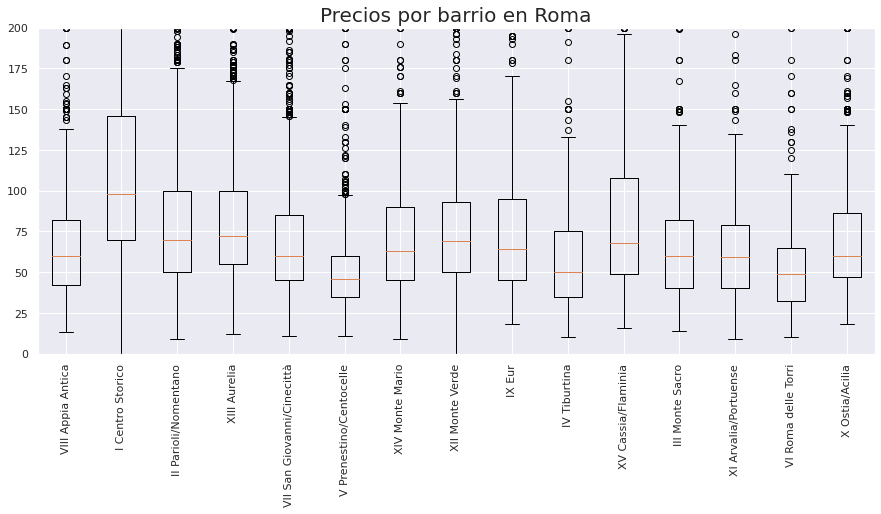

In [ ]:
#1 - Preparamos los datos para los ejes x: barrios; y: precios
lista_barrios=precio_por_barrio.keys() #Lista de barrios
data_barrios=precio_por_barrio.values() #Lista de lista de precios por barrio

#1- Gráfica
plt.figure(figsize = (15,6))
plt.boxplot(data_barrios)
plt.xticks(range(1, len(lista_barrios) + 1), lista_barrios, rotation = 90)
plt.title('Precios por barrio en Roma',fontsize=20);
plt.show();

# Zoom
plt.figure(figsize = (15,6))
plt.boxplot(data_barrios)
plt.xticks(range(1, len(lista_barrios) + 1), lista_barrios, rotation = 90)
plt.title('Precios por barrio en Roma',fontsize=20);
plt.ylim([0,200])
plt.show();



Observando las diferentes distribuciones podemos decir que los barrios que poseen mayores tarifas por noche son:

1.   I Centro Storico
2.   XV Cassia/Flaminia
1.   II Pariolini/Nomentano
2.   IX EUR
1.   XIII Aurelia











# ¿Cuáles son los barrios con mayor oferta de propiedades?

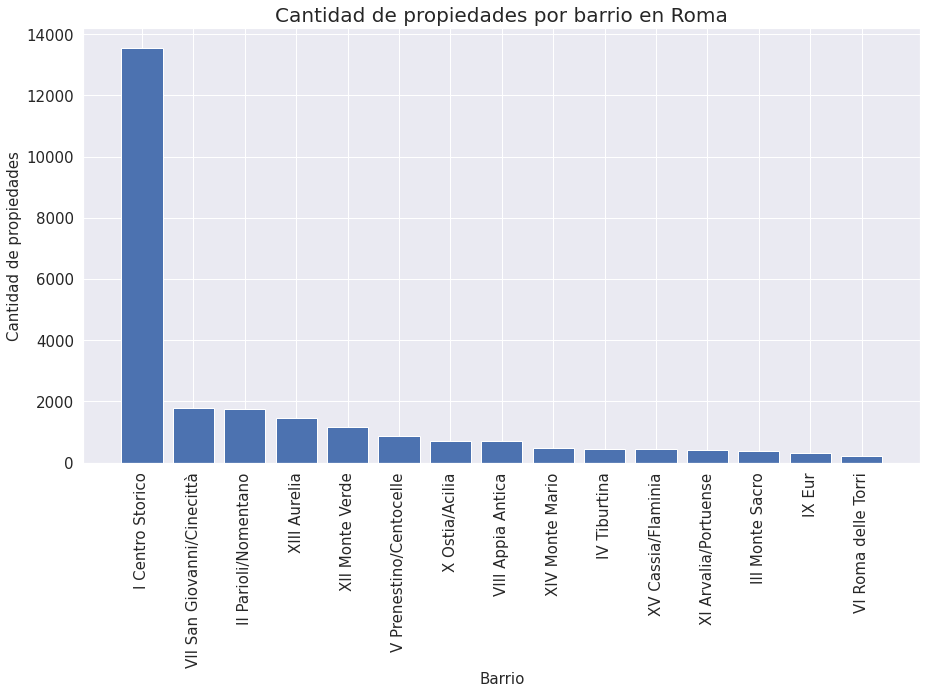

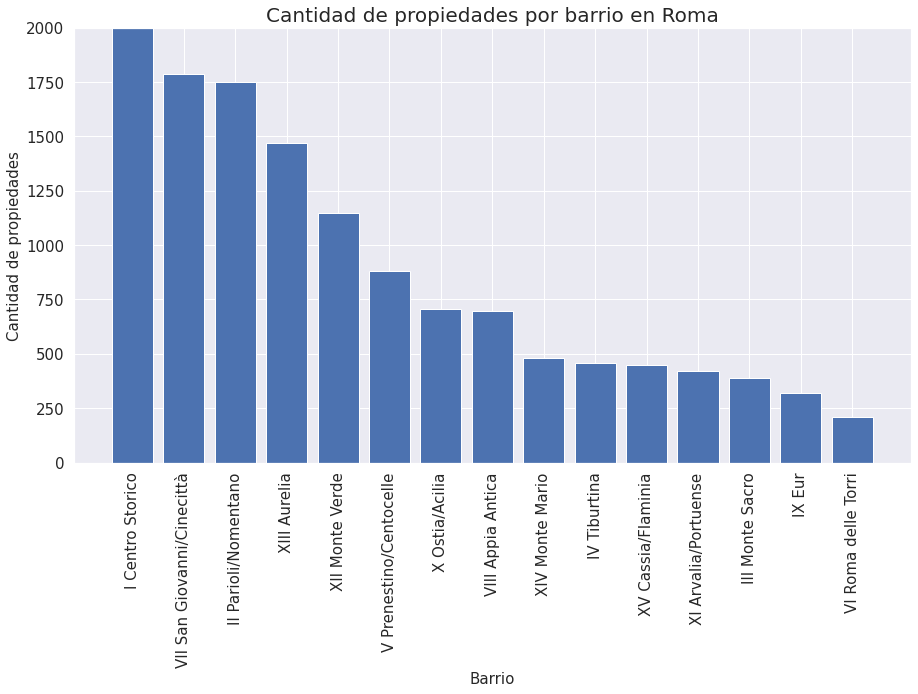

In [ ]:
# Creamos un nuevo diccionario para guardar el número de propiedades ofrecidas en cada barrio de Roma
cant_prop_por_barrio={}
for barrio, precios in precio_por_barrio.items():
    #Recorrimos el diccionario precio_por_barrio y calculamos la longitud de las listas de precios
    #de cada barrio para obtener el número total de propiedades ofrecidas. 
    cant_prop_por_barrio[barrio] = len(precios)

# Llamamos a la función que permite ordenar de forma descendente los barrios según el nro de propiedades ofrecidas:
cant_prop_por_barrio = ordena_dic(cant_prop_por_barrio)


# Gráfica
plt.figure(figsize = (15,8))
plt.bar(cant_prop_por_barrio.keys(),cant_prop_por_barrio.values())
plt.xticks(rotation = 90, fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('Barrio',fontsize=15)
plt.ylabel('Cantidad de propiedades',fontsize=15)
plt.title('Cantidad de propiedades por barrio en Roma',fontsize=20);
plt.show();

# ZOOM
plt.figure(figsize = (15,8))
plt.bar(cant_prop_por_barrio.keys(),cant_prop_por_barrio.values())
plt.xticks(rotation = 90, fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('Barrio',fontsize=15)
plt.ylabel('Cantidad de propiedades',fontsize=15)
plt.title('Cantidad de propiedades por barrio en Roma',fontsize=20);
plt.ylim([0,2000])
plt.show();


Observando el gráfico, los barrios que poseen mayores ofertas de propiedades son:


1.   I Centro Storico
2.   VII San Giovanni/Cinecittá
3.   II Pariolini/Nomentano
4.   XIII Aurelia
5.   XII Monte Verde





# ¿Los barrios con mayor oferta de propiedades son barrios puntuados con la mejor ubicación?

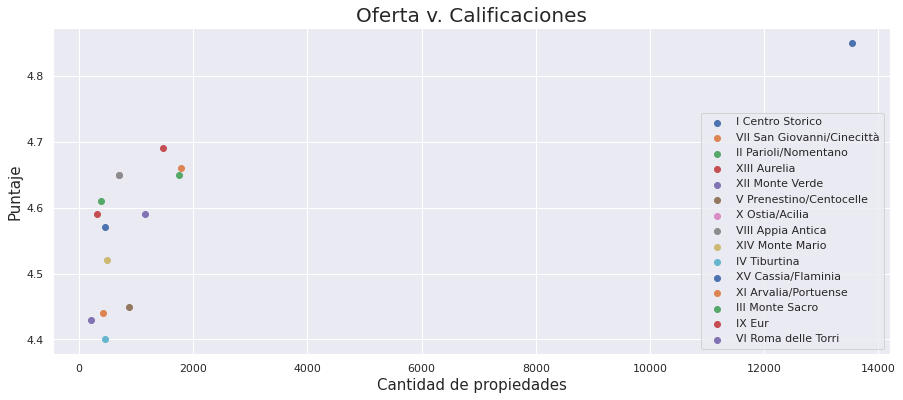

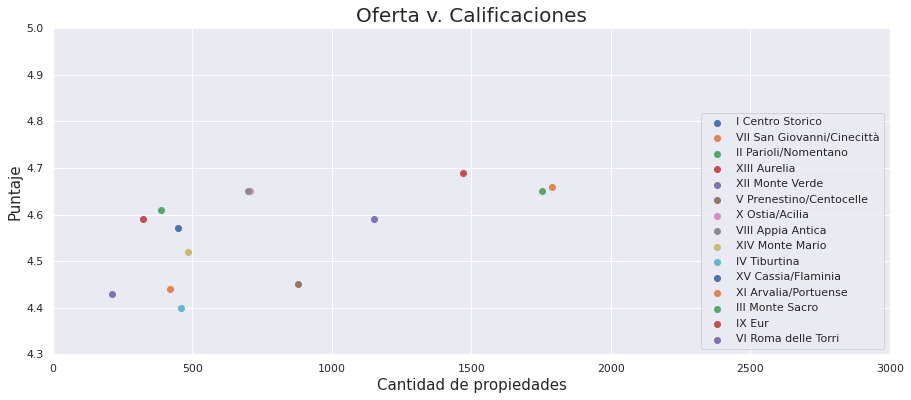

In [ ]:
#Calculamos el puntaje promedio de cada barrio a partir de la lista de puntajes según ubicación de cada barrio

prom_punt = {} #diccionario de puntaje promedio según ubicación de cada barrio

for barrio in punt_por_barrio.keys ():
  # Llamamos a la función promedio_lista para calcular el puntaje promedio por ubicación de cada barrio de Roma
  #Luego el promedio se utiliza para crear el nuevo diccionario
  prom_punt[barrio] = round(promedio_lista(punt_por_barrio[barrio]),2)

# Gráfica
# Las funciones xlabel e ylabel no funcionaban en este tipo de gráfico
# Las reemplazamos según algunos ejemplos que encontramos en https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_demo2.html#sphx-glr-gallery-lines-bars-and-markers-scatter-demo2-py

fig, ax = plt.subplots(figsize = (15,6))

# Graficamos los pares (cant_propiedades;puntaje_promedio) para cada barrio buscando las mismas keys en los dos diccionarios
for barrio in cant_prop_por_barrio.keys(): 
  ax.scatter(cant_prop_por_barrio[barrio], prom_punt[barrio], label=barrio)
ax.set_xlabel('Cantidad de propiedades', fontsize=15)
ax.set_ylabel('Puntaje', fontsize=15)
ax.set_title('Oferta v. Calificaciones', fontsize=20)
ax.grid(True)
plt.legend(loc = 'lower right')
plt.show();

# Graficamos los pares (cant_propiedades;puntaje_promedio) para cada barrio buscando las mismas keys en los dos diccionarios
fig, ax = plt.subplots(figsize = (15,6))
for barrio in cant_prop_por_barrio.keys(): 
  ax.scatter(cant_prop_por_barrio[barrio], prom_punt[barrio], label=barrio)
plt.xlim([0,3000])
plt.ylim([4.3,5])
ax.set_xlabel('Cantidad de propiedades', fontsize=15)
ax.set_ylabel('Puntaje', fontsize=15)
ax.set_title('Oferta v. Calificaciones', fontsize=20)
ax.grid(True)
plt.legend(loc = 'lower right')
plt.show();


Los barrios que poseen mayores ofertas de propiedades son los barrios mejores ubicados:



> 1. I Centro Storico
> 2. VII San Giovanni/Cinecittá
> 3. II Pariolini/Nomentano
> 4. XIII Aurelia
> 5. XII Monte Verde


# ¿Cuáles son las amenities más comunes que se ofrecen vía airbnb en Roma?

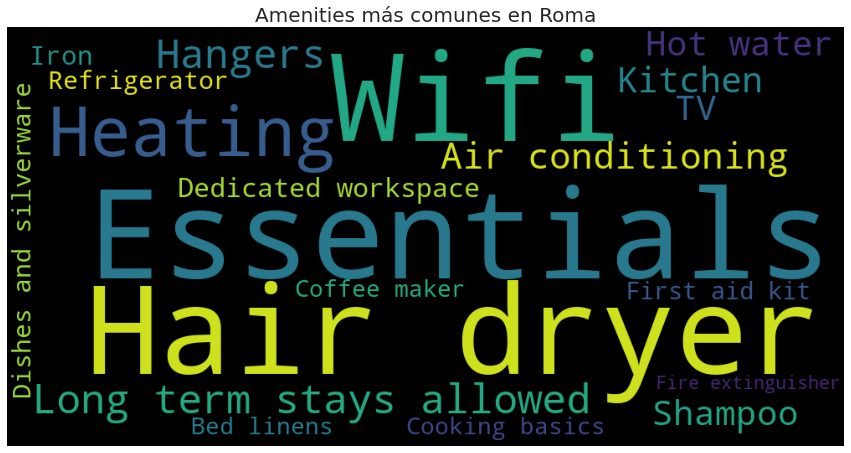

In [ ]:

amenities_cant_ord = {}

#Llamamos a la función que permite ordenar de forma descendente el diccionario según los valores del mismo:
amenities_cant_ord = ordena_dic(amenities_cant)

#Armamos un nuevo diccionario con las 20 amenities más comunes ofrecidas en Roma a través de airbnb
amenities_top20 = {}
cont=0

for a, c in amenities_cant_ord.items():
    amenities_top20[a] = amenities_cant_ord[a]
    cont +=1
    if cont == 20:
      break

#Realizamos el gráfico nube de palabras tomando como base el diccionario amenities_top20:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(amenities_top20)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title('Amenities más comunes en Roma',fontsize=20);
plt.axis("off");
plt.show();


Cómo podemos observar las amenties más comúnes que se ofrecen en Roma son:


*   Hair Dryer
*   Wifi
*   Essentials (toilet paper, soap for hands and body, one towel per guest, one pillow per guest, linens for each guest bed)
*   Heating
